# Package Install & Open Data


## Import

In [1]:
col,Str='Zona de ventas.1','Temuco'
def Df_ubic(data_X,col,Str):
    df=data_X.copy()
    df=df[df[col]==Str]
    return df

In [2]:
# =============================================================================
# Importar paquetes y abrir Data
# =============================================================================

#gestion DF
import pandas as pd

#Funciones mat y matricicales
import numpy as np

#ploteo simple
import matplotlib.pyplot as plt

# Graficas bonitas
from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

#mode function
import statistics 


##  Data Facturación CT

llega hasta el 2021
Esta data contiene las facturaciones(Ventas a los clientes del canal tradicional)

In [3]:
# =============================================================================
# Ajuste de los datos
# =============================================================================

col_names=pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data = pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [4]:
col,Str=('Oficina de Ventas Unifica','Temuco')
Data=Df_ubic(Data,col,Str)

### Ajuste facturaciones

In [5]:
#data[data['Día natural']>datetime.date(2021, 4, 12)]

In [6]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Kilos Venta KG','Venta Neta CLP','Precio Promedio CLP']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        df[i]=df[i].astype('int64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [7]:
data=Ajuste_data(Data)
data.head(3)
#data=<data[data['Año']>2018]

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
75186,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,15.2021,2021-04-12,LU,43,182668,4290,15,2021
75187,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,16.2021,2021-04-21,MI,43,157268,3690,16,2021
75188,1020003,Tradicional,Z004,Sur,Temuco,T105,8000480112,Espec. en Crudos,Sin asignar,Castro Muñoz Jose Isaias,3200104287,4,17.2021,2021-04-26,LU,20,69393,3390,17,2021


##  Data Clientes
Esta data posee las caracteristicas de los clientes del canal tradicional

In [8]:
Cluster = pd.read_csv("Data/Cluster_clientes.csv",
                          encoding="utf-8",sep=";",dtype={'Cliente - Local.1': 'str'})

### Incluir Columna Cluster(Segmento de cliente)

In [9]:
DF_ventas=pd.merge(Cluster[['Cliente - Local.1','identified_clusters']] , data  
     , how='right')

In [10]:
DF_ventas.tail(3)

,Cliente - Local.1,identified_clusters,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,...,Cliente - Local,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
3870,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,10,42.2020,2020-10-13,MA,40,187863,4750,42,2020
3871,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,12,50.2019,2019-12-10,MA,37,99308,2692,50,2019
3872,3200145770,0.0,1020003,Tradicional,Z004,Sur,Temuco,T105,8000580107,Multiespecialista,...,Hurtado Campos Orlando,12,49.2020,2020-12-01,MA,20,87176,4450,49,2020


## Data Stock
Esta data posee el nivel de stock de las sucursales de la zona de santiago

In [11]:
SKU='1020003'
fillN='Stock CL '+SKU
col_names=pd.read_csv("Data/last_down/"+fillN+".csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data_stock = pd.read_csv("Data/last_down/"+fillN+".csv",
                   encoding="utf-8",sep=";",dtype=types_dict)
Data_stock.head()

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock
0,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,30.12.2019,8,"111,8"
1,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,31.12.2019,7,"111,8"
2,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,02.01.2020,5,"111,8"
3,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,03.01.2020,4,"111,8"
4,Cerdo,1020003,Sur,T019,Punta Arenas,01.2020,04.01.2020,3,"111,8"


In [12]:
Data_stock=Df_ubic(Data_stock,'Oficina de ventas.1',Str)

In [13]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    
    #proceso iterativo, 
    for i in ['Stock']:
    # se elimina el punto definido para los miles
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # Se pasa de ser un str a un int
        #df[i]=df[i].astype('int64')
        df[i]=df[i].astype('float64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    df['Vida Útil Restante']=df['Vida Útil Restante'].astype('int64')
    return df

In [14]:
Data_stock=Ajuste_data(Data_stock)

In [15]:
Data_stock['Vida Útil Restante']=Data_stock['Vida Útil Restante'].astype('float64')
Data_stock=Data_stock[Data_stock['Vida Útil Restante']>=3]
Data_stock=Data_stock[Data_stock['Vida Útil Restante']<=7]

In [16]:
Data_stock.tail()

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock,Semana,Año
4788,Cerdo,1020003,Sur,T105,Temuco,01.2021,2021-01-05,6.0,125.2,1,2021
4789,Cerdo,1020003,Sur,T105,Temuco,01.2021,2021-01-06,6.0,187.3,1,2021
4790,Cerdo,1020003,Sur,T105,Temuco,01.2021,2021-01-07,5.0,266.2,1,2021
4791,Cerdo,1020003,Sur,T105,Temuco,01.2021,2021-01-08,4.0,247.0,1,2021
4825,Cerdo,1020003,Sur,T005,Temuco,53.2020,2020-12-28,6.0,95.0,53,2020


## Demanda Z001
Data_totales posee el DF de todas las ventas de Z001

In [17]:
fillN='Vetas Totales CL 1020003'
col_names=pd.read_csv("Data/last_down/"+fillN+".csv",
                    encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in col_names}

Data_totales = pd.read_csv("Data/last_down/"+fillN+".csv",
                   encoding="utf-8",sep=";",dtype=types_dict)

In [18]:
#col,Str='Oficina de Ventas Unifica','Temuco'
Data_totales=Df_ubic(Data_totales,col,Str)

In [19]:
Data_totales.describe(include='all')

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Zona de reparto,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta,Precio Promedio
count,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243
unique,1,5,1,1,1,1,100,24,3,572,584,12,228,1281,6,363,9415,614
top,1020003,Supermercados,Z004,Sur,Temuco,T105,8000580079,Potencial,Sin asignar,Eltit San Luis,3200048452,2,08.2020,28.11.2019,VI,20,67.200,3.200
freq,11243,6290,11243,11243,11243,11243,1331,5252,7762,520,520,1458,118,40,2502,775,16,1352


### Ajuste data 

In [20]:
# =============================================================================
# Ajustar la data
# =============================================================================
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    def delete_asterisco(x):
        x=str(x)
        return x.replace('*','0' )
    
    #proceso iterativo, 
    for i in ['Kilos Venta KG','Venta Neta','Precio Promedio']:
    # se elimina el punto definido para los miles
        if(i!='Kilos Venta KG'):
            df[i]=df[i].str.split('CLP', expand=True)[[0]]
        df[i]=df[i].apply(change_num_point)
        # se reemplaza la coma por un punto, para definir los decimales correctamente
        df[i]=df[i].apply(change_num_coma)
        # se elimina el valor * 
        df[i]=df[i].apply(delete_asterisco)
        
        # Se pasa de ser un str a un int
        print(i)
        df[i]=df[i].astype('int64')

    #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [21]:
Data_totales=Ajuste_data(Data_totales)

Kilos Venta KG
Venta Neta
Precio Promedio


# Ajuste de fecha Demanda y Stock 
La Data de Demanda representa la demanda del dia anterior, para contrastarlo con el stock

## Demanda Dia Z001
representa la demanda del dia anterior, para contrastarlo con el stock

In [22]:
Data_totales['Tipo de cliente'].unique()

array(['Tradicional', 'Supermercados', 'Industriales', 'Grandes Clientes',
       'Foodservice'], dtype=object)

In [23]:
Demanda_dia_Zona=Data_totales.groupby('Día natural').sum().reset_index()[['Día natural', 'Kilos Venta KG']]
Demanda_dia_Zona.head()

,Día natural,Kilos Venta KG
0,2017-01-03,53
1,2017-01-04,276
2,2017-01-05,195
3,2017-01-06,357
4,2017-01-07,138


In [24]:
Demanda_dia_Zona.describe(include='all')

,Día natural,Kilos Venta KG
count,1281,1281.000000
unique,1281,NaN
top,2018-01-18,NaN
freq,1,NaN
mean,NaN,395.425449
std,NaN,421.110878
min,NaN,10.000000
25%,NaN,169.000000
50%,NaN,286.000000
75%,NaN,463.000000


## Stock  Dia Z001

In [25]:
Data_stock.tail(2)

,Sector,Material,Zona de ventas,Oficina de ventas,Oficina de ventas.1,Año natural/Semana,Día natural,Vida Útil Restante,Stock,Semana,Año
4791,Cerdo,1020003,Sur,T105,Temuco,01.2021,2021-01-08,4.0,247.0,1,2021
4825,Cerdo,1020003,Sur,T005,Temuco,53.2020,2020-12-28,6.0,95.0,53,2020


Primera parte del calculo de la Vida Útil Restante Promedio

In [26]:
Data_stock['Vida Útil Restante']=Data_stock['Vida Útil Restante'].astype('float64')
Data_stock=Data_stock[Data_stock['Vida Útil Restante']>=3]
Data_stock=Data_stock[Data_stock['Vida Útil Restante']<=7]

Data_stock['Stock']=Data_stock['Stock'].astype('float64')
Data_stock['Vida Útil Restante Promedio']=Data_stock['Vida Útil Restante']*Data_stock['Stock']

### Stock total 

In [27]:
Data_stock=Data_stock.groupby('Día natural').sum().reset_index()[['Día natural', 'Stock','Vida Útil Restante Promedio']]


### Ajuste de fecha 

In [28]:
Data_stock['Día natural']=Data_stock['Día natural']+datetime.timedelta(days=1)
Data_stock['Día natural']

0      2020-03-17
1      2020-03-18
2      2020-03-19
3      2020-03-20
4      2020-03-24
          ...    
160    2021-04-27
161    2021-04-28
162    2021-04-29
163    2021-04-30
164    2021-05-01
Name: Día natural, Length: 165, dtype: object

In [29]:
#weekday_name[datetime.date(2021, 5, 10).weekday()]
Data_stock['Día natural']=Data_stock['Día natural'].apply(lambda x: 
                                                                    x+datetime.timedelta(days=1) 
                                                                    if(x.weekday() >= 6) else x)

### Vida util restante

In [30]:
Data_stock['Vida Útil Restante Promedio']=Data_stock['Vida Útil Restante Promedio']/Data_stock['Stock']
Data_stock.head()

,Día natural,Stock,Vida Útil Restante Promedio
0,2020-03-17,1921.5,6.0
1,2020-03-18,1930.1,6.0
2,2020-03-19,2529.2,6.0
3,2020-03-20,1142.6,6.0
4,2020-03-24,2368.4,7.0


## Merge de Stock Demanda 

In [31]:
DF_VS=pd.merge(Demanda_dia_Zona[['Día natural', 'Kilos Venta KG']] 
               , Data_stock[['Día natural','Vida Útil Restante Promedio', 'Stock']]  
     , how='right')
DF_VS.sort_values(by=['Día natural'], inplace=True)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2020-03-17,415.0,6.0,1921.5
1,2020-03-18,246.0,6.0,1930.1
2,2020-03-19,1328.0,6.0,2529.2
3,2020-03-20,334.0,6.0,1142.6
4,2020-03-24,101.0,7.0,2368.4


In [32]:
DF_VS['Kilos Venta KG']=DF_VS['Kilos Venta KG'].fillna(0)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2020-03-17,415.0,6.0,1921.5
1,2020-03-18,246.0,6.0,1930.1
2,2020-03-19,1328.0,6.0,2529.2
3,2020-03-20,334.0,6.0,1142.6
4,2020-03-24,101.0,7.0,2368.4


In [33]:
DF_VS['Stock']=DF_VS['Stock'].fillna(0)
DF_VS.head()

,Día natural,Kilos Venta KG,Vida Útil Restante Promedio,Stock
0,2020-03-17,415.0,6.0,1921.5
1,2020-03-18,246.0,6.0,1930.1
2,2020-03-19,1328.0,6.0,2529.2
3,2020-03-20,334.0,6.0,1142.6
4,2020-03-24,101.0,7.0,2368.4


# Precio promedio
Kilos Venta KG= sum(Kilos Venta KG)

Venta Neta CLP	= la suma de los ingresos

\begin{equation}
Precio_{ponderado} [{\dfrac{CLP}{KG}}]= \dfrac{Ingresos_{totales}[CLP]}{Volumen de ventas[KG]}
\end{equation}

In [47]:
def P_podn(data):
    df=data.groupby('Día natural').sum().reset_index()#[['Día natural', 'Kilos Venta KG']]
    df['Precio Ponderado']=df['Venta Neta']/df['Kilos Venta KG']
    #df['Día natural']=df['Día natural']-datetime.timedelta(days=1)
    return df[['Día natural','Kilos Venta KG','Precio Ponderado']]
P_podn(Data_totales).tail()

,Día natural,Kilos Venta KG,Precio Ponderado
1276,2021-05-17,201,5325.671642
1277,2021-05-18,40,5324.275000
1278,2021-05-19,397,5142.544081
1279,2021-05-20,264,4747.507576
1280,2021-05-22,103,5497.330097


In [48]:
 P_podn(Data_totales).head()

,Día natural,Kilos Venta KG,Precio Ponderado
0,2017-01-03,53,3087.396226
1,2017-01-04,276,3349.873188
2,2017-01-05,195,3259.928205
3,2017-01-06,357,3599.044818
4,2017-01-07,138,3382.811594


In [49]:
#=====================================
# Merge
#=====================================
DF_VS2=pd.merge( P_podn(Data_totales)  ,DF_VS
     , how='left')#'right')
DF_VS2.head()

,Día natural,Kilos Venta KG,Precio Ponderado,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento
0,2017-01-03,53,3087.396226,NaN,NaN,NaN,NaN
1,2017-01-04,276,3349.873188,NaN,NaN,NaN,NaN
2,2017-01-05,195,3259.928205,NaN,NaN,NaN,NaN
3,2017-01-06,357,3599.044818,NaN,NaN,NaN,NaN
4,2017-01-07,138,3382.811594,NaN,NaN,NaN,NaN


# Demanda vs ____ 

## Exploración Stock vs Facturas 

#DF_VS Posee los niveles de Stok Abastecimiento y Demanda de la Z001
DF_VS

In [34]:
from mizani.breaks import date_breaks
from mizani.formatters import date_format

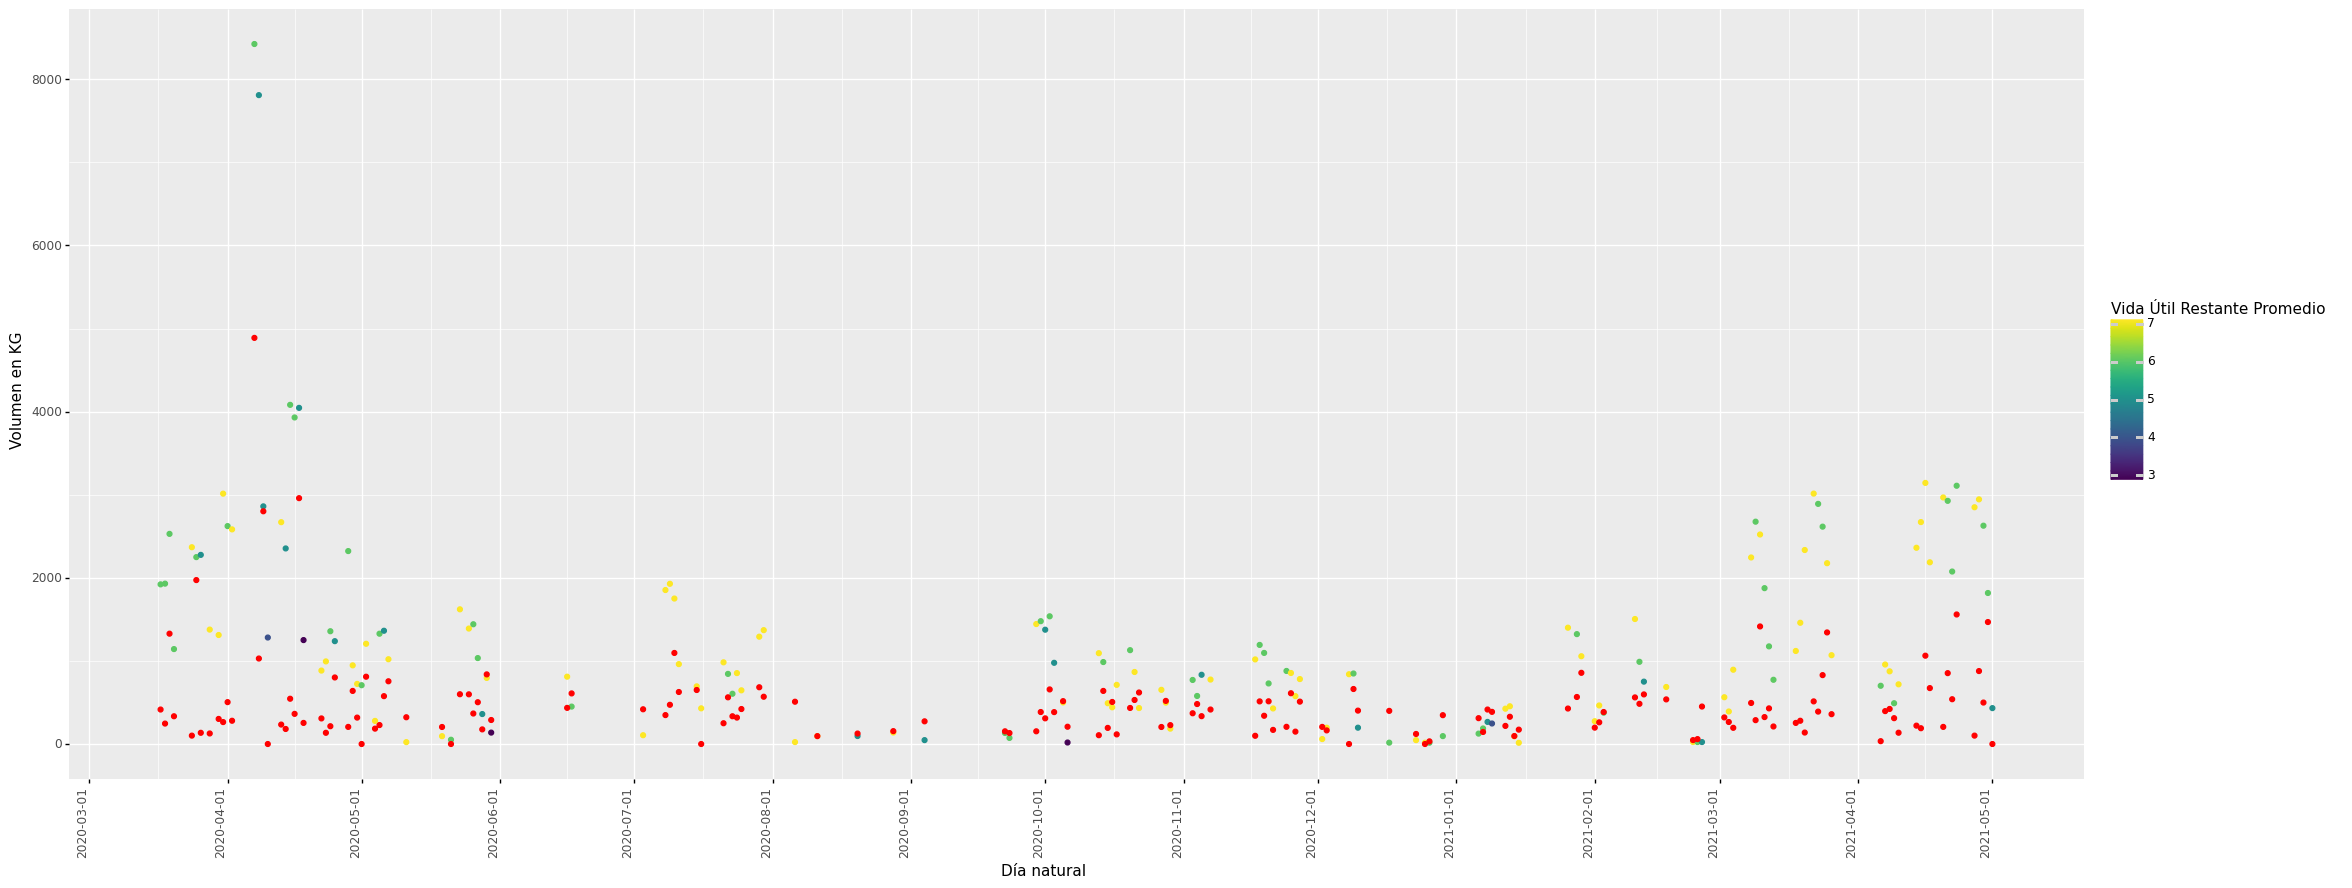

<ggplot: (182474697006)>

In [78]:
dx=DF_VS[DF_VS['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(x='Día natural',
                               y= 'Stock'))\
                + labs(y='Volumen en KG',x='Día natural',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ))\
                 + geom_point(aes(x='Día natural',
                               y= 'Kilos Venta KG'),color='red')\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

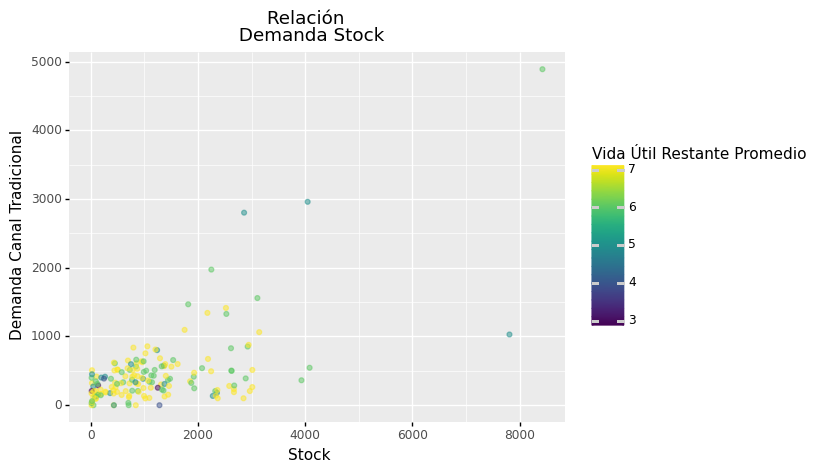

<ggplot: (182474534178)>

In [79]:
dx=DF_VS[DF_VS['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Kilos Venta KG',
                               x= 'Stock'))\
                + labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+' \n Demanda Stock'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

In [114]:
DF_VS2.columns

Index(['Día natural', 'Kilos Venta KG', 'Precio Ponderado',
       'Vida Útil Restante Promedio', 'Stock', 'Stock+1', 'Abastecimiento'],
      dtype='object')

C:\Users\rolft\Anaconda3\envs\Predict\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1123 rows containing missing values.


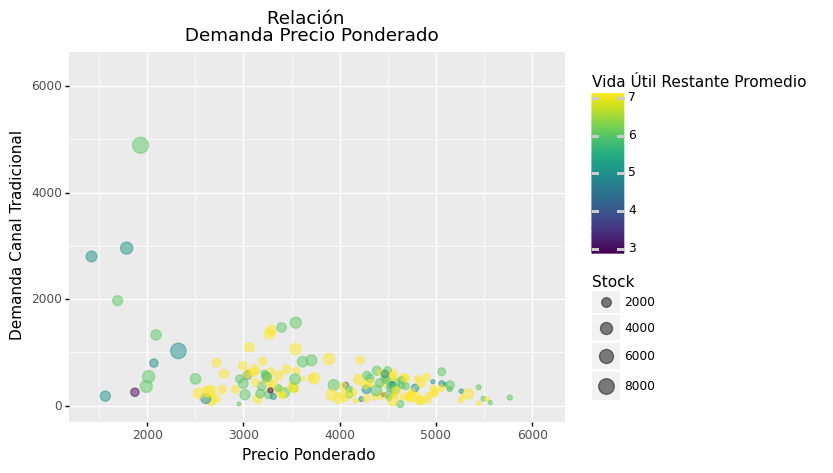

<ggplot: (182476009885)>

In [120]:
dx=DF_VS2
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Kilos Venta KG',
                               x= 'Precio Ponderado'))\
                + labs(y='Demanda Canal Tradicional')\
                + geom_point(aes(color='Vida Útil Restante Promedio',size='Stock'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+' \n Demanda Precio Ponderado'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

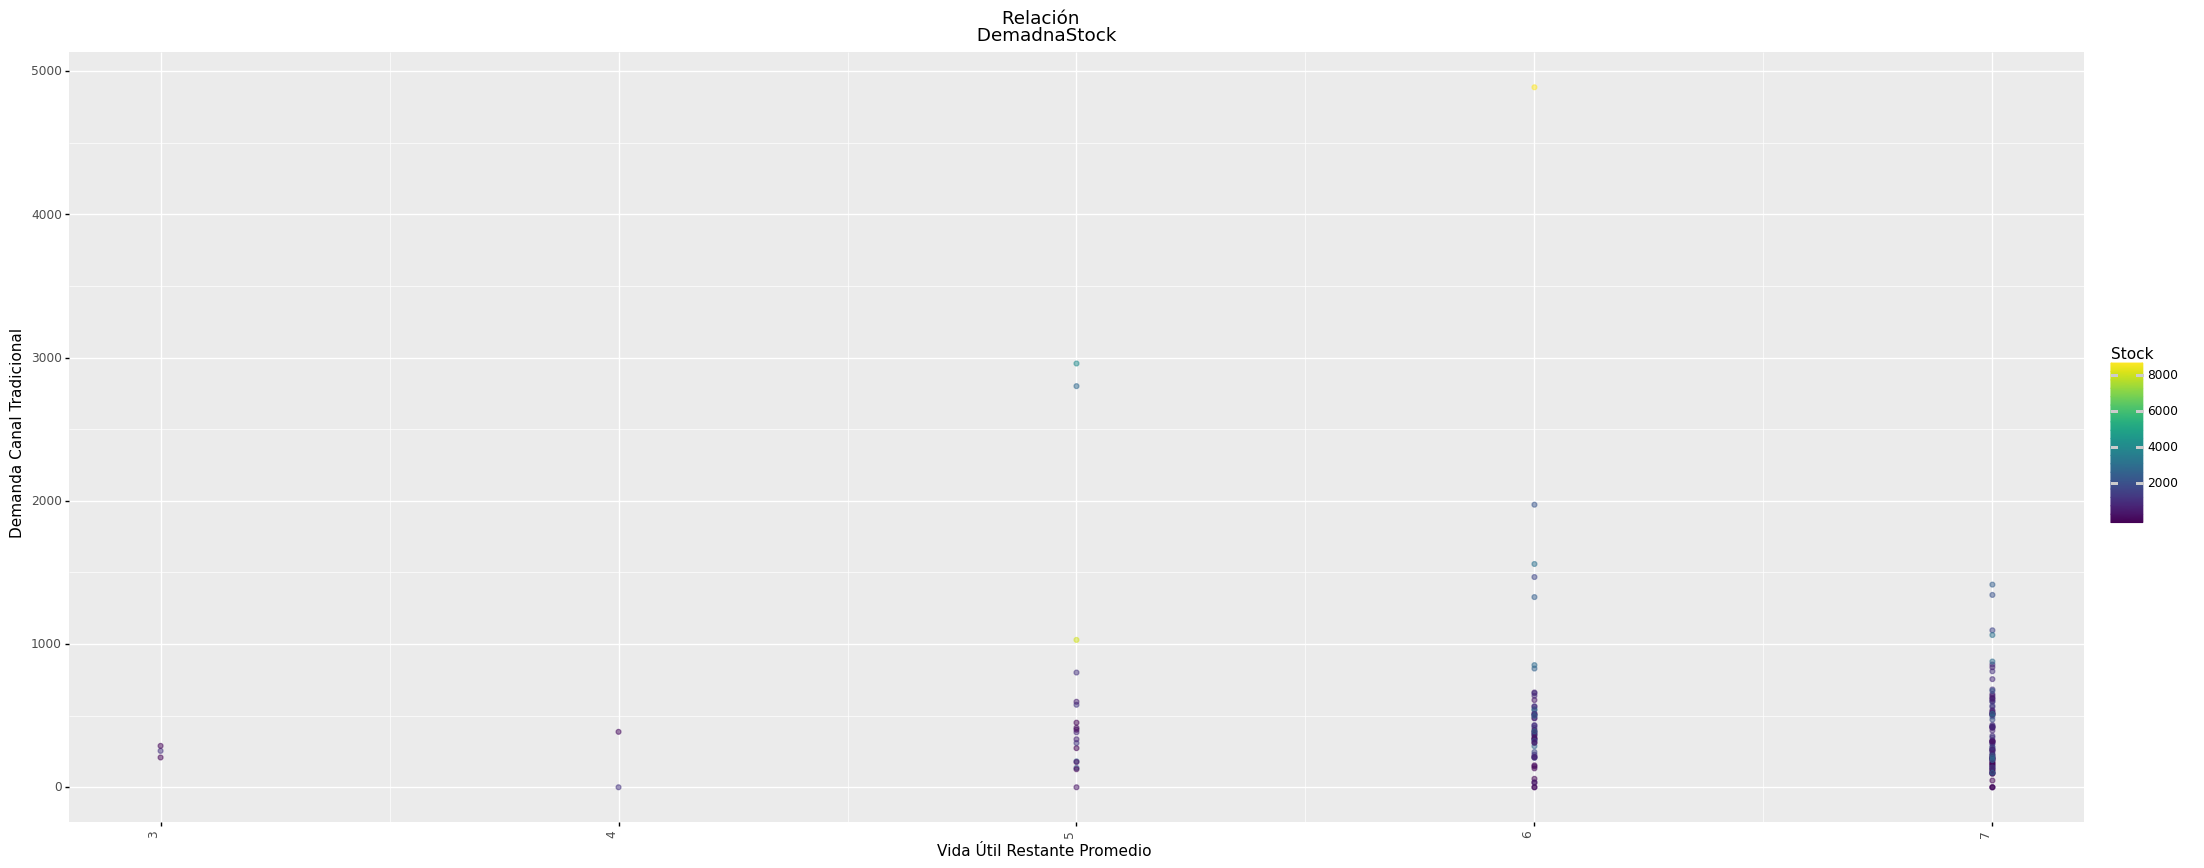

<ggplot: (182474595088)>

In [80]:
dx=DF_VS[DF_VS['Vida Útil Restante Promedio']>=2]
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Kilos Venta KG',
                               x= 'Vida Útil Restante Promedio'))\
                + labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Stock'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n DemadnaStock'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

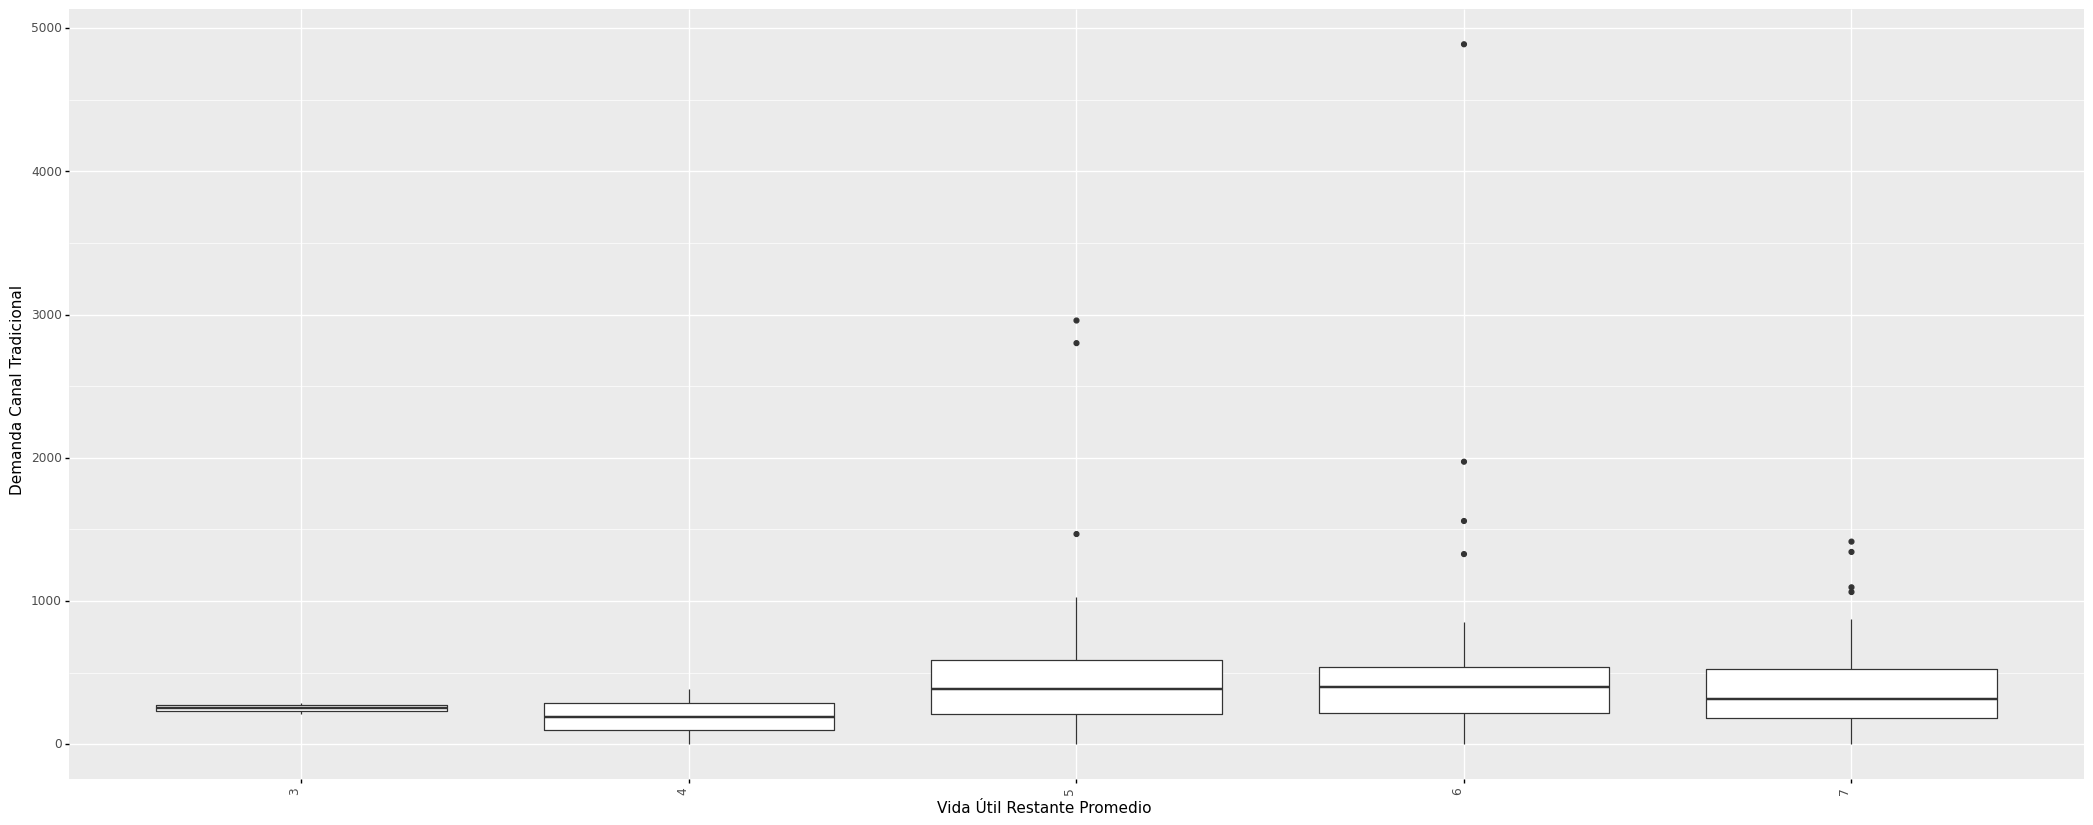

<ggplot: (182476866292)>

In [86]:
dx=DF_VS.copy()
dx['Vida Útil Restante Promedio']=dx['Vida Útil Restante Promedio'].astype('int64')
dx['Vida Útil Restante Promedio']=dx['Vida Útil Restante Promedio'].astype('category')
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Kilos Venta KG',
                               x= 'Vida Útil Restante Promedio'))\
                + labs(y='Demanda Canal Tradicional',size=14)\
                + geom_boxplot()\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

## relacion del error de la demanda

In [57]:
fillN='E_interv_Dem'
col_names=pd.read_csv(""+fillN+".csv",
                    encoding="utf-8",sep=",",nrows=0).columns
types_dict = {col: str for col in col_names}

DF_Predict = pd.read_csv(""+fillN+".csv",
                   encoding="utf-8",sep=",",dtype=types_dict)

DF_Predict = DF_Predict.rename(columns={'ds':"Día natural"})
DF_Predict["Día natural"] = DF_Predict["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%Y-%m-%d').date())
DF_Predict.head(1)
DF_Predict.head()

,Día natural,y,yhat,Error,Error %,Semana,Mes
0,2021-01-05,84,65.41716603449484,-18.58283396550516,-0.22122421387506142,1,1
1,2021-01-06,65,196.31829054241493,131.31829054241493,2.0202813929602295,1,1
2,2021-01-07,112,190.28695592948122,78.28695592948122,0.6989906779417967,1,1
3,2021-01-08,160,256.02109547223955,96.02109547223955,0.6001318467014971,1,1
4,2021-01-09,216,215.85050279251377,-0.14949720748623463,-0.000692116701325185,1,1


### Merge con DF de mercado

Se utiliza temp2 porque no tieien datos repretidos, se sumaron las columnas para que no se sumen los 1 con los 0, en algunos casos.

tomar en cuenta que la 

In [87]:
DF_Predict.Error=DF_Predict.Error.astype('float64')
DF_Predict['Error %']=DF_Predict['Error %'].astype('float64')

In [88]:
DF_Estu=pd.merge(DF_VS2,
                 DF_Predict
                 , how='inner')
DF_Estu.head()

,Día natural,Kilos Venta KG,Precio Ponderado,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento,y,yhat,Error,Error %,Semana,Mes
0,2021-01-05,463,5266.410367,NaN,NaN,NaN,NaN,84,65.41716603449484,-18.582834,-0.221224,1,1
1,2021-01-06,311,5143.694534,6.0,125.2,187.3,373.1,65,196.31829054241493,131.318291,2.020281,1,1
2,2021-01-07,145,4514.793103,6.0,187.3,266.2,223.9,112,190.28695592948122,78.286956,0.698991,1,1
3,2021-01-08,415,5061.949398,5.0,266.2,247.0,395.8,160,256.02109547223955,96.021095,0.600132,1,1
4,2021-01-09,387,4062.423773,4.0,247.0,425.1,565.1,216,215.85050279251377,-0.149497,-0.000692,1,1


### Graficos 

C:\Users\rolft\Anaconda3\envs\Predict\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 51 rows containing missing values.


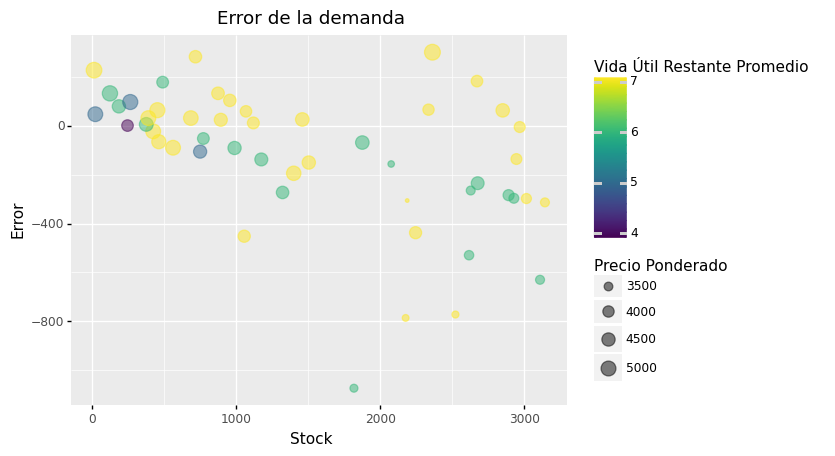

<ggplot: (182476882643)>

In [91]:
dx=DF_Estu
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Error',x= 'Stock'))\
                    +ggtitle(('Error de la demanda'))
                #+ labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ,size='Precio Ponderado'),alpha=0.5)
    )
GRaph_Disp_cluster

C:\Users\rolft\Anaconda3\envs\Predict\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 51 rows containing missing values.


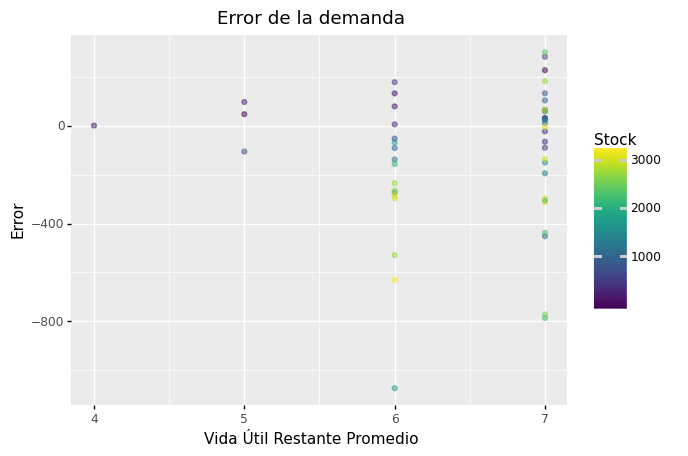

<ggplot: (182474567804)>

In [93]:
dx=DF_Estu
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Error',
                               x= 'Vida Útil Restante Promedio'))\
    +ggtitle(('Error de la demanda'))
                #+ labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Stock'
                     ),alpha=0.5)
    )
GRaph_Disp_cluster

In [71]:
DF_Estu.columns

Index(['Día natural', 'Kilos Venta KG', 'Precio Ponderado',
       'Vida Útil Restante Promedio', 'Stock', 'Stock+1', 'Abastecimiento',
       'y', 'yhat', 'Error', 'Error %', 'Semana', 'Mes'],
      dtype='object')

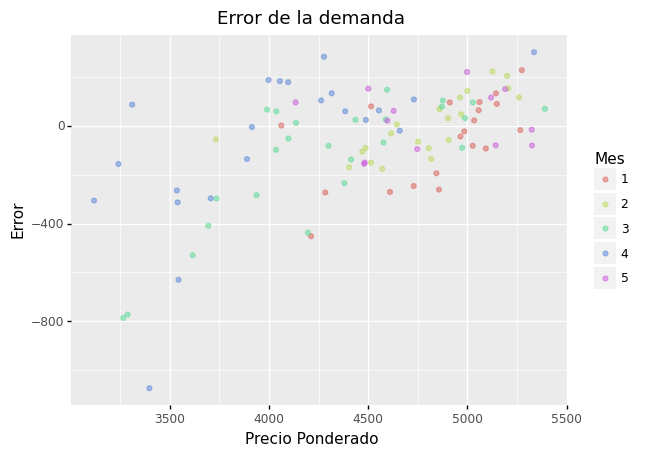

<ggplot: (182476177279)>

In [94]:
dx=DF_Estu
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Error',
                               x= 'Precio Ponderado'))\
                #+ labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Mes'
                     ),alpha=0.5)\
    +ggtitle(('Error de la demanda'))
                #+ggtitle(('Relación'+' \n DemadnaStock'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

# Precio vs _____

In [50]:
DF_VS2['Precio Ponderado'].mean()

3304.5548369555163

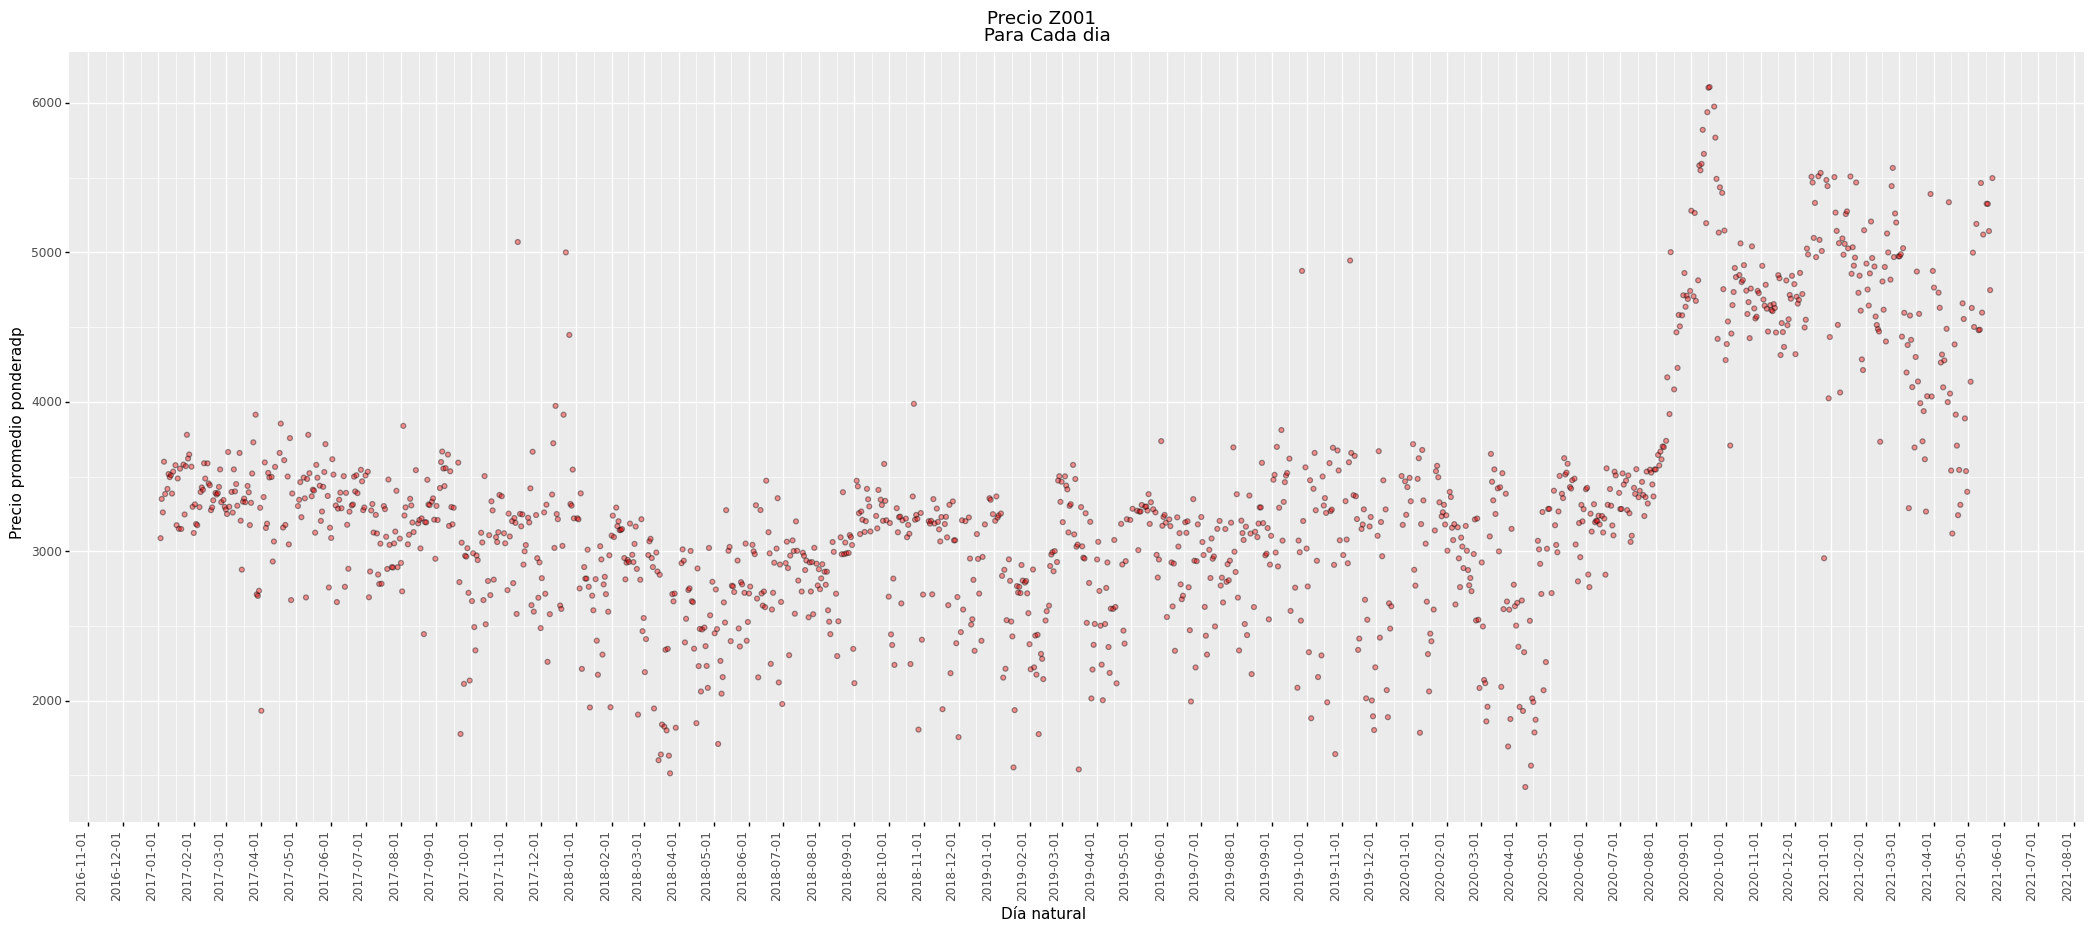

<ggplot: (182474698957)>

In [95]:
Abastec=(
    ggplot(DF_VS2,
           aes(x='Día natural',y='Precio Ponderado'))                 
                + geom_point(fill='red',alpha=0.4)\
                + labs(y='Precio promedio ponderadp',x='Día natural',size=14)\
                +ggtitle(('Precio Z001'+
                          ' \n Para Cada dia'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                + scale_x_datetime(breaks=date_breaks('1 month'))  
    )
Abastec

C:\Users\rolft\Anaconda3\envs\Predict\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1123 rows containing missing values.


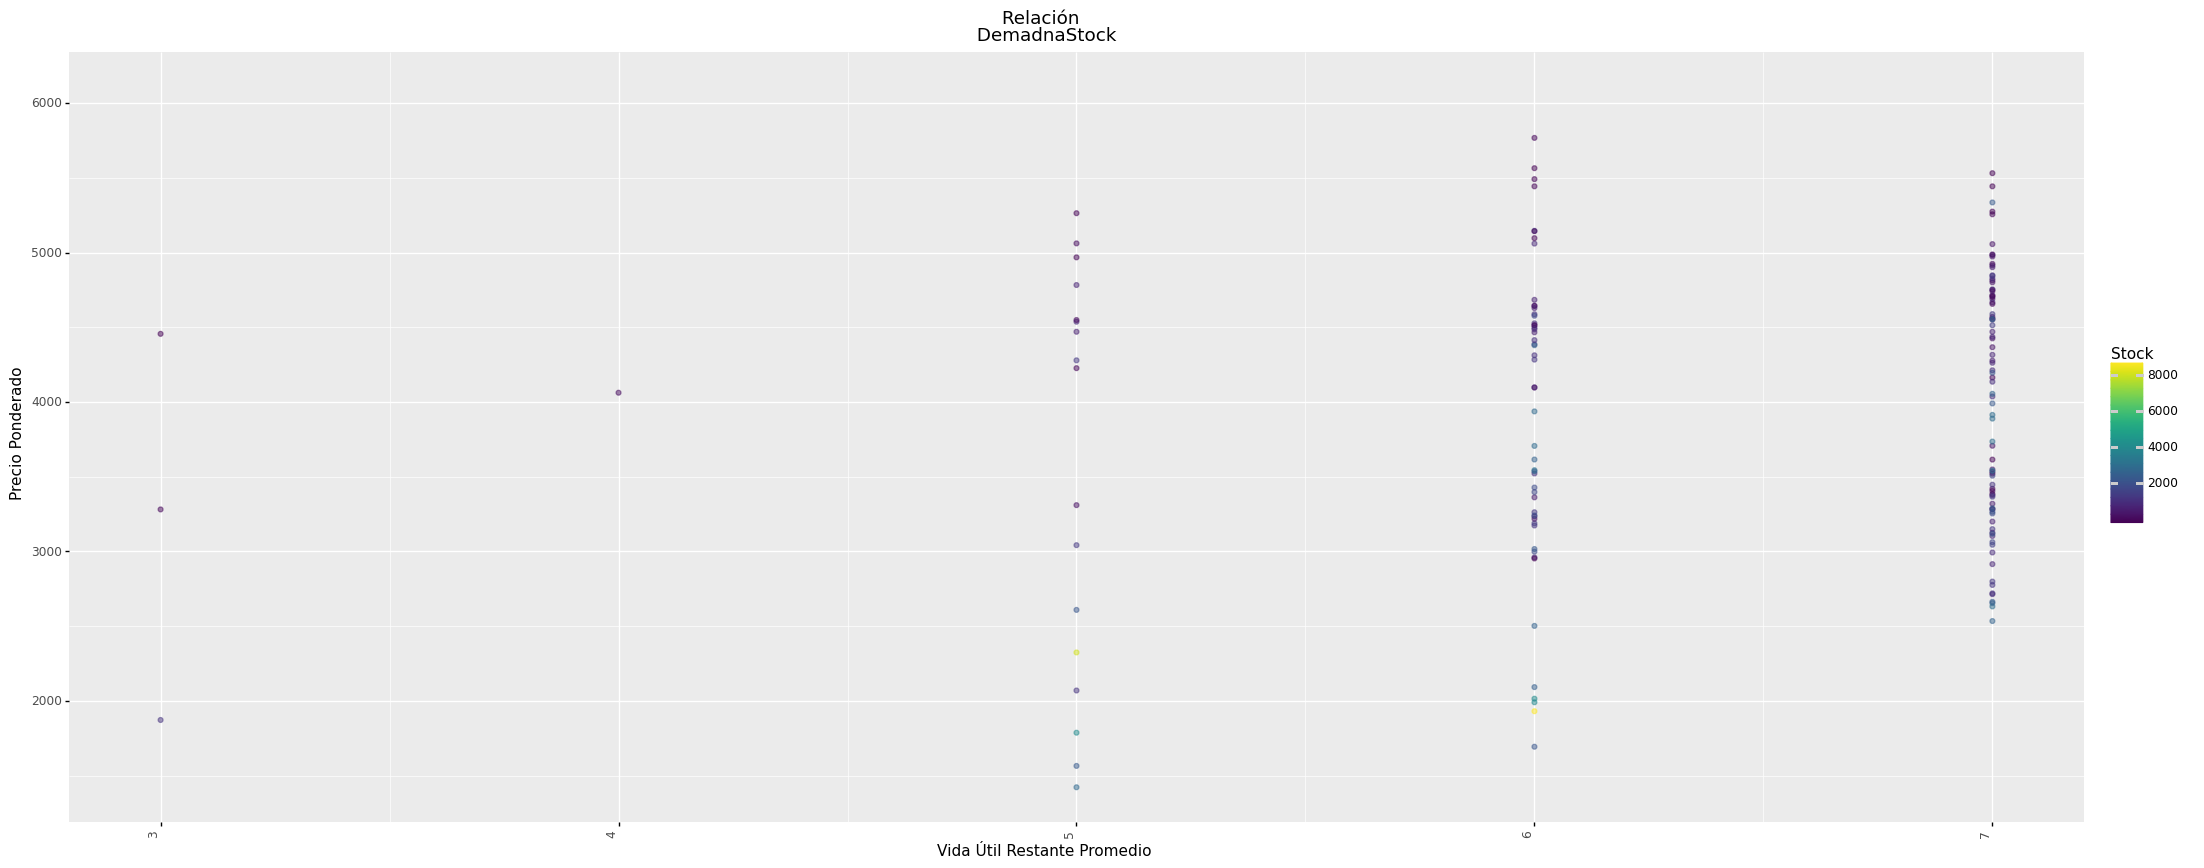

<ggplot: (182474453809)>

In [96]:
dx=DF_VS2
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Precio Ponderado',
                               x= 'Vida Útil Restante Promedio'))\
                #+ labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Stock'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n DemadnaStock'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

In [53]:
DF_VS2.columns

Index(['Día natural', 'Kilos Venta KG', 'Precio Ponderado',
       'Vida Útil Restante Promedio', 'Stock', 'Stock+1', 'Abastecimiento'],
      dtype='object')

C:\Users\rolft\Anaconda3\envs\Predict\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 1123 rows containing missing values.


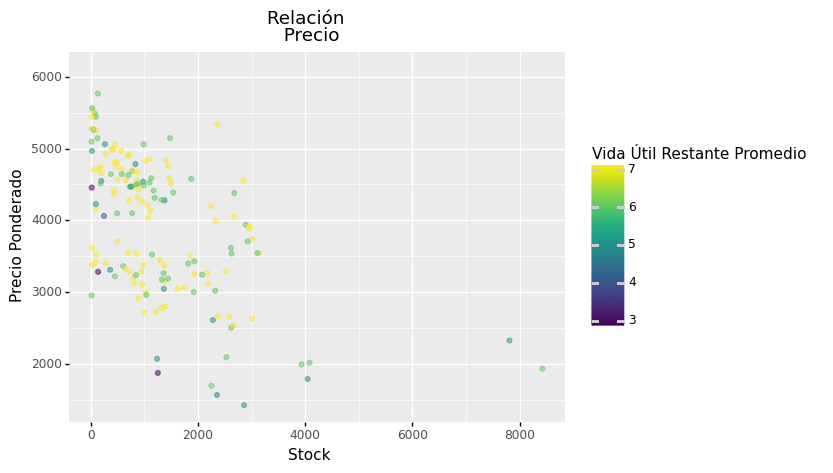

<ggplot: (182474514014)>

In [99]:
dx=DF_VS2
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Precio Ponderado',
                               x='Stock' ))\
                #+ labs(x='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n Precio'))\

                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

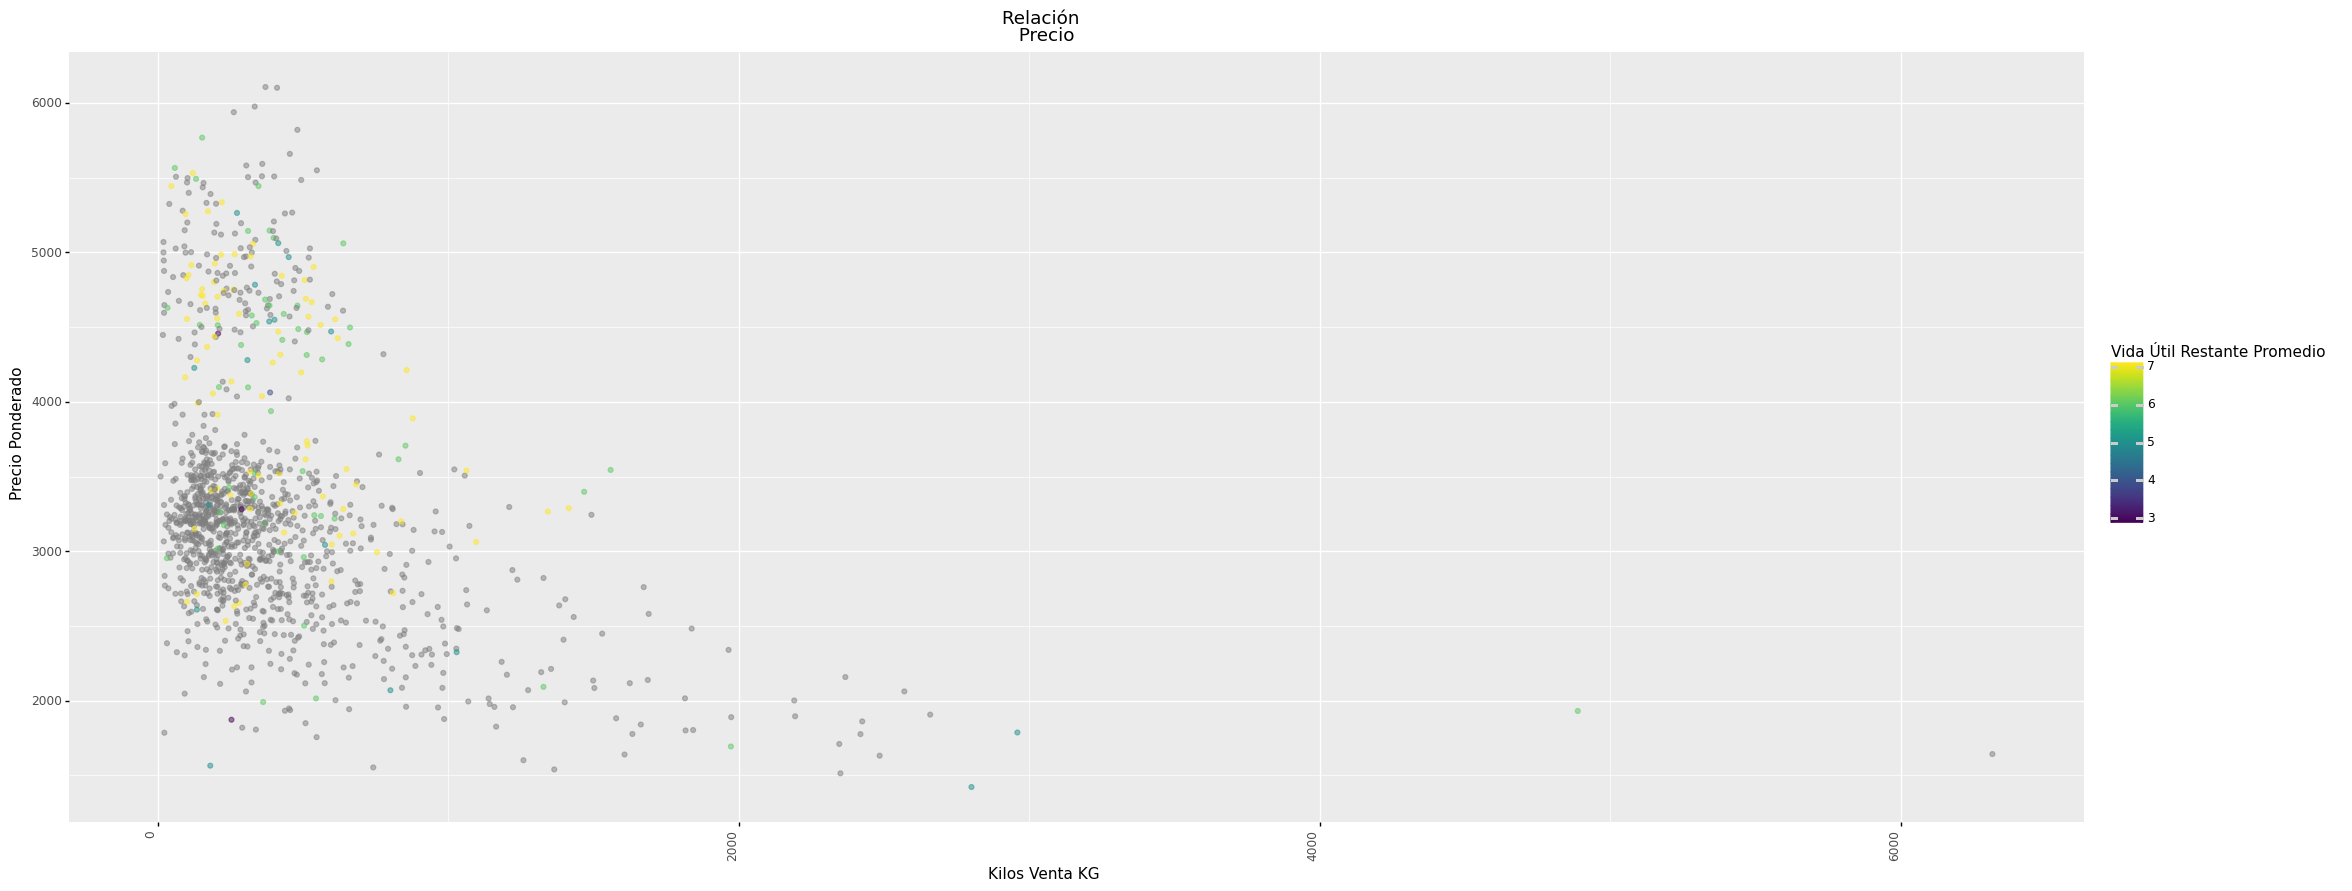

<ggplot: (182476919074)>

In [102]:
dx=DF_VS2
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Precio Ponderado',
                               x='Kilos Venta KG' ))\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ),alpha=0.5)\
                +ggtitle(('Relación'+
                          ' \n Precio'))\
                +theme(axis_text_x = element_text(angle=90, hjust=1)
                       ,figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

## relacion del error de la demanda

In [104]:
fillN='E_interv_Prec'
col_names=pd.read_csv(""+fillN+".csv",
                    encoding="utf-8",sep=",",nrows=0).columns
types_dict = {col: str for col in col_names}

DF_Predict = pd.read_csv(""+fillN+".csv",
                   encoding="utf-8",sep=",",dtype=types_dict)

DF_Predict = DF_Predict.rename(columns={'ds':"Día natural"})
DF_Predict["Día natural"] = DF_Predict["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%Y-%m-%d').date())
DF_Predict.head(1)
DF_Predict.head()

,Día natural,y,yhat,Error,Error %,Semana,Mes
0,2021-01-05,5522.940476190476,4915.45882325961,-607.4816529308664,-0.10999243166746664,1,1
1,2021-01-06,4643.523076923077,4804.5747731882775,161.05169626520092,0.03468308299480194,1,1
2,2021-01-07,4471.044642857143,4649.842146714513,178.79750385736952,0.03999009585892033,1,1
3,2021-01-08,4527.78125,4698.500514452797,170.71926445279678,0.037704839307949545,1,1
4,2021-01-09,3907.8055555555557,4553.670096504997,645.8645409494411,0.16527550610373742,1,1


### Merge con DF de mercado

Se utiliza temp2 porque no tieien datos repretidos, se sumaron las columnas para que no se sumen los 1 con los 0, en algunos casos.

tomar en cuenta que la 

In [105]:
DF_Predict.Error=DF_Predict.Error.astype('float64')
DF_Predict['Error %']=DF_Predict['Error %'].astype('float64')

In [106]:
DF_Estu2=pd.merge(DF_VS2,
                 DF_Predict
                 , how='inner')
DF_Estu2.head()

,Día natural,Kilos Venta KG,Precio Ponderado,Vida Útil Restante Promedio,Stock,Stock+1,Abastecimiento,y,yhat,Error,Error %,Semana,Mes
0,2021-01-05,463,5266.410367,NaN,NaN,NaN,NaN,5522.940476190476,4915.45882325961,-607.481653,-0.109992,1,1
1,2021-01-06,311,5143.694534,6.0,125.2,187.3,373.1,4643.523076923077,4804.5747731882775,161.051696,0.034683,1,1
2,2021-01-07,145,4514.793103,6.0,187.3,266.2,223.9,4471.044642857143,4649.842146714513,178.797504,0.039990,1,1
3,2021-01-08,415,5061.949398,5.0,266.2,247.0,395.8,4527.78125,4698.500514452797,170.719264,0.037705,1,1
4,2021-01-09,387,4062.423773,4.0,247.0,425.1,565.1,3907.8055555555557,4553.670096504997,645.864541,0.165276,1,1


### Graficos 

C:\Users\rolft\Anaconda3\envs\Predict\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 51 rows containing missing values.


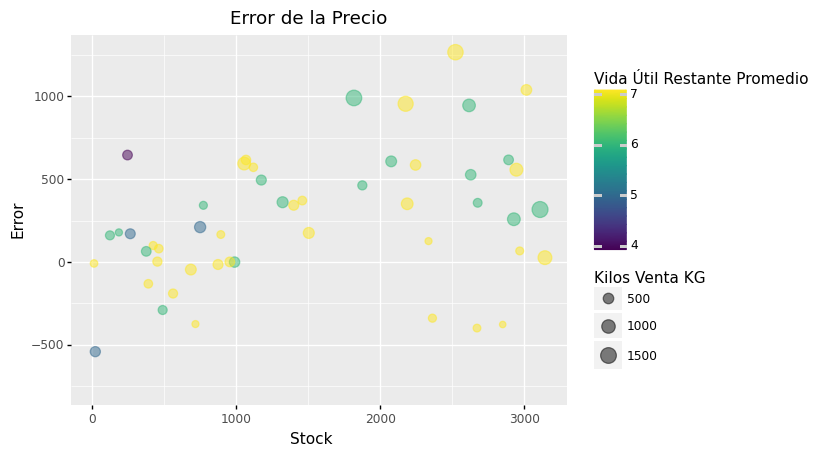

<ggplot: (182474975169)>

In [112]:
dx=DF_Estu2
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Error',x= 'Stock'))\
                    +ggtitle(('Error de la Precio '))
                #+ labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Vida Útil Restante Promedio'
                     ,size='Kilos Venta KG'),alpha=0.5)
    )
GRaph_Disp_cluster

C:\Users\rolft\Anaconda3\envs\Predict\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 51 rows containing missing values.


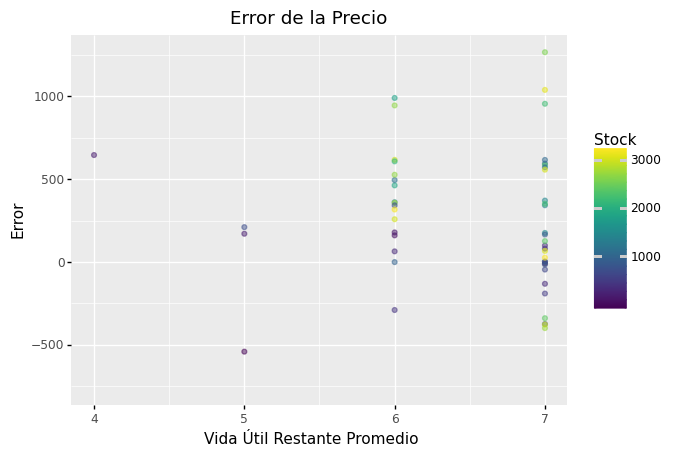

<ggplot: (182476869581)>

In [108]:
dx=DF_Estu2
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Error',
                               x= 'Vida Útil Restante Promedio'))\
    +ggtitle(('Error de la Precio '))
                #+ labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Stock'
                     ),alpha=0.5)
    )
GRaph_Disp_cluster

In [109]:
DF_Estu.columns

Index(['Día natural', 'Kilos Venta KG', 'Precio Ponderado',
       'Vida Útil Restante Promedio', 'Stock', 'Stock+1', 'Abastecimiento',
       'y', 'yhat', 'Error', 'Error %', 'Semana', 'Mes'],
      dtype='object')

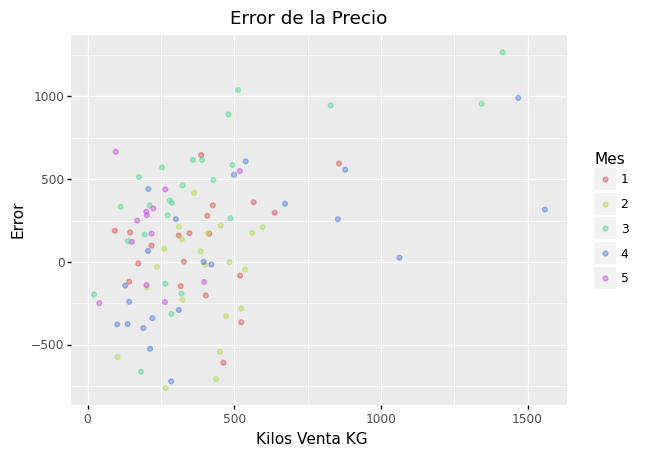

<ggplot: (182474991541)>

In [110]:
dx=DF_Estu2
GRaph_Disp_cluster=(
    ggplot(dx, aes(y='Error',
                               x= 'Kilos Venta KG'))\
                #+ labs(y='Demanda Canal Tradicional',size=14)\
                + geom_point(aes(color='Mes'
                     ),alpha=0.5)\
    +ggtitle(('Error de la Precio '))
                #+ggtitle(('Relación'+' \n DemadnaStock'))\
                #+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(26,10))
                 #+ scale_x_continuous(breaks=X_brak,labels=X_brak_S)
                #+ scale_x_datetime(breaks=date_breaks('1 month'))  
    )
GRaph_Disp_cluster

#  Formación Data Predicciones

Artificial Neural Network + Prophet Model of Facebook


\begin{equation}
Demanda=
Prophet+E_p
\end{equation}

\begin{equation}
E_p=ANN + E_ANN
\end{equation}


* Falta incorporar el precio como variable
    * Precio del CT
    * Precio de Z001
    * Precio dia anterior
    * Precio o semana anterior

```python

#DF_ventas Posee las ventas de los clientes del CT
DF_ventas 

#DF_VS Posee los niveles de Stok Abastecimiento y Demanda de la Z001
DF_VS

# Dias_Festivos Posee los dias festivos del 2019 al 2020
Dias_Festivos
```

Se juntaran los 3 df para formar 1, para ello se generará en primer lugar un df con

```python
DF_ventas[DF_ventas['identified_clusters']==4].groupby('Día natural').sum().reset_index()[['Día natural','Kilos Venta KG']]
``` 


De tal forma que se tiene la demanda dia del segmento, Despues se realiza un Merge con cada uno de los otros DF, de tal forma que la demanda dia posee más partes X que le agregan robustes al modelo.
